In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Ignore the DeprecationWarning caused by a deprecated function
warnings.filterwarnings('ignore', category=DeprecationWarning)


# Loading the data set

In [4]:
df=pd.read_csv("austo_automobile+(2)+(1).csv")

Basic Data Exploration
In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

head of the dataset
shape of the dataset
info of the dataset
summary of the dataset

In [4]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [5]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [31]:
df.shape

(1581, 14)

The data set has 1581 observations and 14 variables in the data set

In [42]:
df.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1581.000000,1581.000000,1475.000000,1581.000000,1581.000000
mean,31.922201,2.464263,60392.220114,20225.559322,79398.545225,35597.722960
std,8.425978,0.928532,14674.825044,19573.149277,24849.147996,13633.636545
min,22.000000,0.500000,30000.000000,0.000000,30000.000000,18000.000000
25%,25.000000,2.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,2.000000,59500.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,3.000000,71800.000000,38300.000000,95900.000000,47000.000000
max,54.000000,4.000000,99300.000000,80500.000000,149000.000000,70000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


info() is used to check the Information about the data and the datatypes of each respective attributes

In [9]:
df.duplicated().sum()

0

In [15]:
df['Gender'].replace(['Femal', 'Femle'], 'Female', inplace=True)

# Outlier Treatment

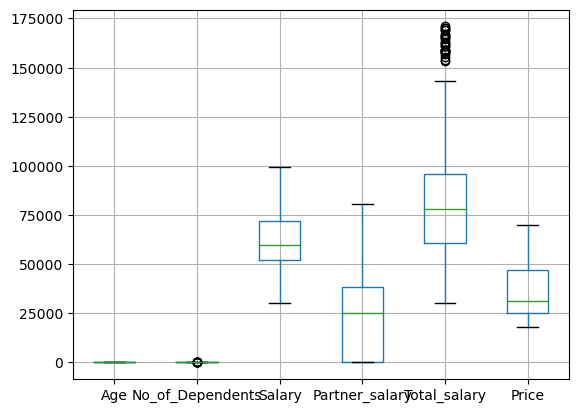

In [12]:
df.boxplot()
plt.show()


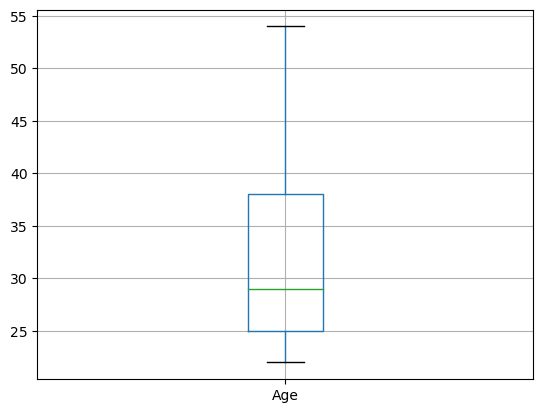

In [25]:
df.boxplot(column=['Age'])
plt.show()

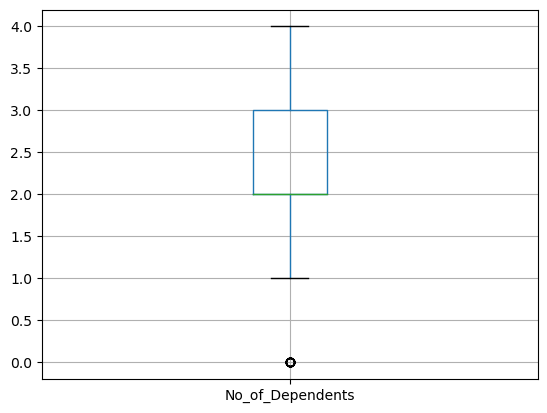

In [26]:
df.boxplot(column=['No_of_Dependents'])
plt.show()

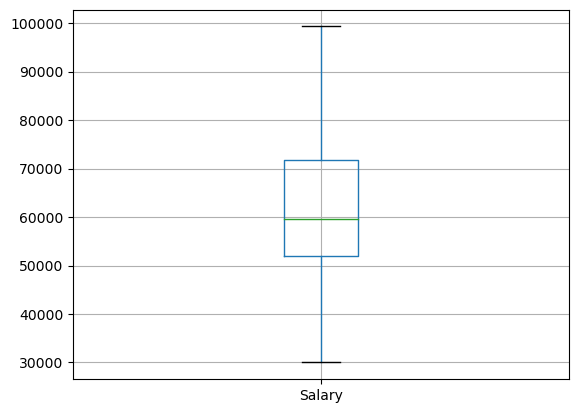

In [27]:
df.boxplot(column=['Salary'])
plt.show()

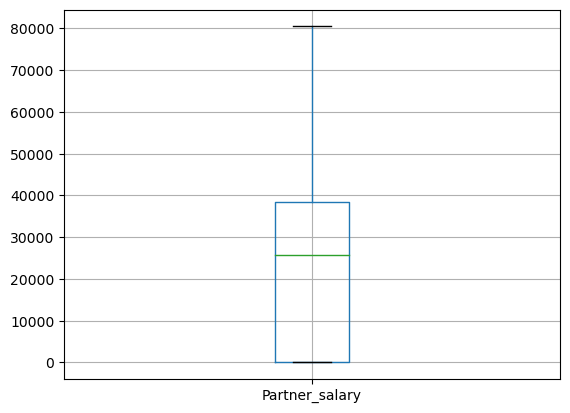

In [29]:
df.boxplot(column=['Partner_salary'])
plt.show()

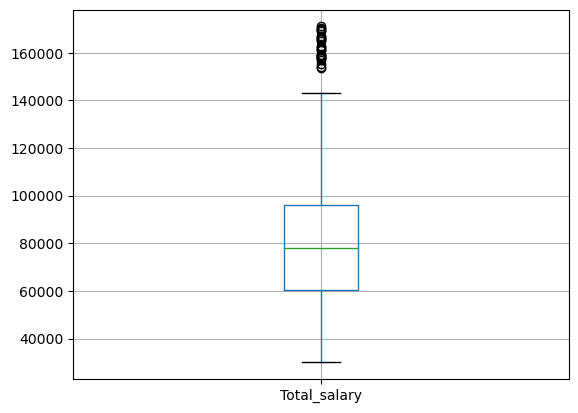

In [30]:
df.boxplot(column=['Total_salary'])
plt.show()

 Looking at the box plot, it seems that these two variables Total_salary, No_of_dependents have outliers.

These outliers value needs to be teated and there are several ways of treating them:

Drop the outlier value
Replace the outlier value using the IQR
Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.

In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [40]:
lrtotsalary,urtotsalary=remove_outlier(df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']>urtotsalary,urtotsalary,df['Total_salary'])
df['Total_salary']=np.where(df['Total_salary']<lrtotsalary,lrtotsalary,df['Total_salary'])


lrno_of_Dependents,urno_of_Dependents=remove_outlier(df['No_of_Dependents'])
df['No_of_Dependents']=np.where(df['No_of_Dependents']>urno_of_Dependents,urno_of_Dependents,df['No_of_Dependents'])
df['No_of_Dependents']=np.where(df['No_of_Dependents']<lrno_of_Dependents,lrno_of_Dependents,df['No_of_Dependents'])


df.shape

(1581, 14)

# Boxplots after Outlier Treatment

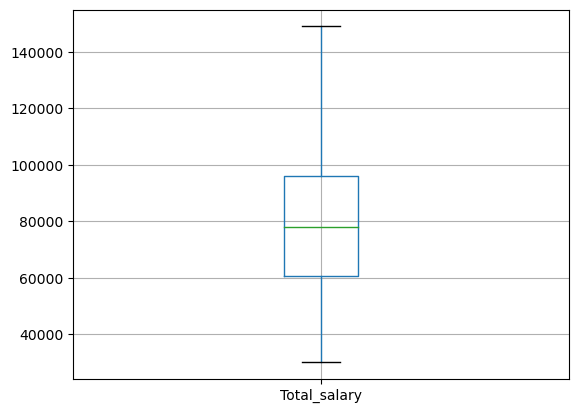

In [37]:
df.boxplot(column=['Total_salary'])
plt.show()

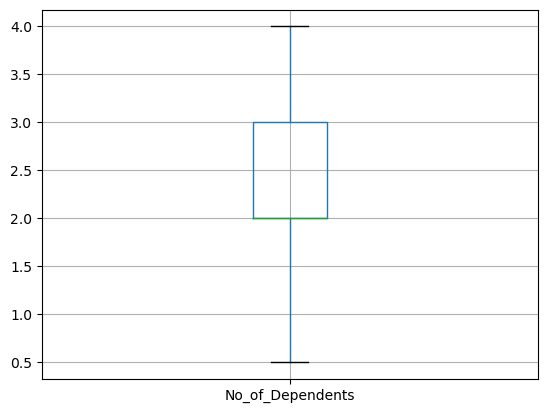

In [39]:
df.boxplot(column=['No_of_Dependents'])
plt.show()

If we look at the box plots above,post treating the outlier there are no outliers in all these columns

# Check for missing values

In [3]:
df.isnull().sum()[df.isnull().sum()>0]

Gender             53
Partner_salary    106
dtype: int64

Replacing NULL values in Categorical Columns using Mode

In [13]:
mode1=df["Gender"].mode().values[0]
df["Gender"]=df["Gender"].replace(np.nan,mode1)

# Replace missing partner salary values with the difference between total salary and salary
df['Partner_salary'] = np.where(df['Partner_salary'].isnull(),
                                df['Total_salary'] - df['Salary'],
                                df['Partner_salary'])

In [7]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,0.0,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,0.0,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [8]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [10]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

# Univariate Aanalysis

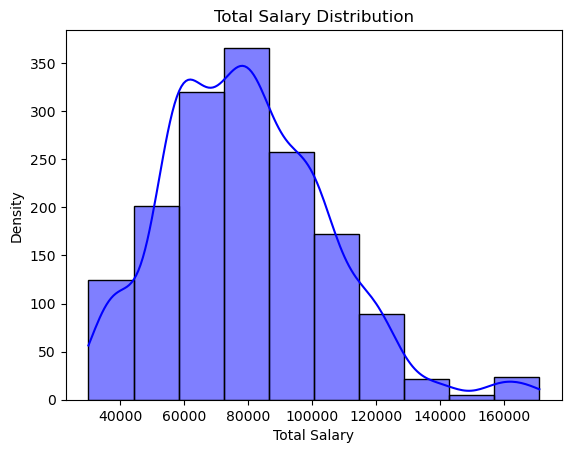

In [15]:
sns.histplot(data=df, x='Total_salary', bins=10, kde=True, color='blue')
plt.title('Total Salary Distribution')
plt.xlabel('Total Salary')
plt.ylabel('Density')
plt.show()

So from this graph we can see that the maximum people fall into the category of having total salary from 60,000 to 90,0000..


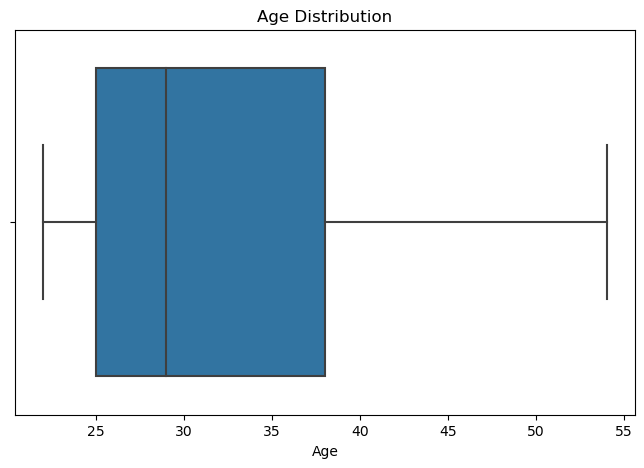

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Age')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

From the age distribution we can see that majority of the customers are ranging from the age 25 to 38 with 30 being the median age 

In [23]:
#df['Gender'] = df['Gender'].replace('Femal', 'Female')
#df['Gender'] = df['Gender'].replace('Femle', 'Female')
gender_counts = df['Gender'].value_counts()
print(gender_counts)


Male      1199
Female     329
Name: Gender, dtype: int64


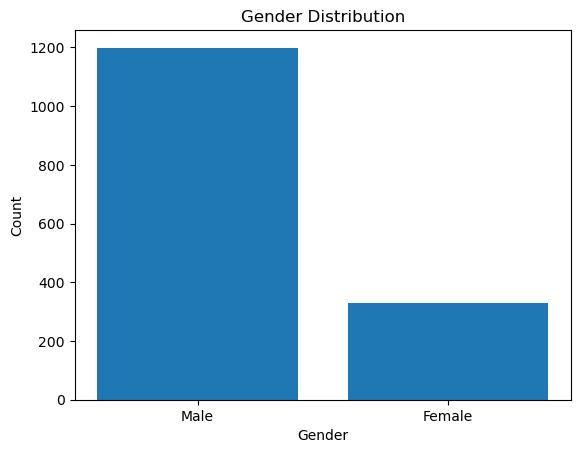

In [21]:
gender_counts = df['Gender'].value_counts()

# Create a bar plot to visualize the gender distribution
plt.bar(gender_counts.index, gender_counts.values)

# Add title and axis labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From the gender distribution we can identify that the number of Males are much higher amounting to more than 1200 whereas, the number of Female comes to just above 300 which is even 1/4 th of the Male population who purchases cars from the dataset


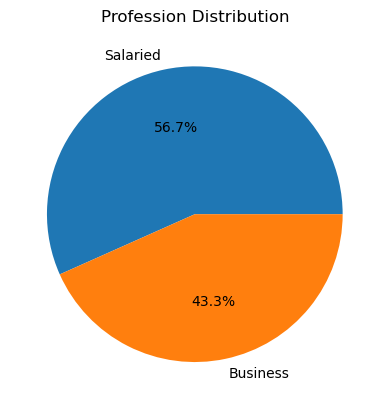

In [17]:
# Get the value counts of the Profession column
profession_counts = df['Profession'].value_counts()

# Create a pie chart to visualize the profession distribution
plt.pie(profession_counts.values, labels=profession_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Profession Distribution')

# Show the plot
plt.show()



From the above plot we can identify that from the given dataset of people purchasing car, among the profession almost 56.7% people are salaried working professional whereas almost 43.3% are doing business 

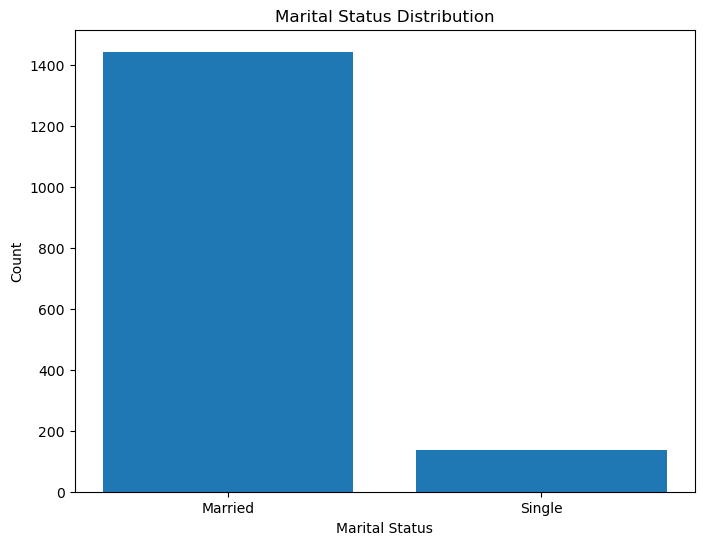

In [80]:
plt.bar(df['Marital_status'].value_counts().index, df['Marital_status'].value_counts().values)

# set plot title and labels
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# display plot
plt.show()

From the above Marital Status distribution we can identify that the majority chunk of customers are married almost nearing to more than 1400 whereas the single population is as low as 100.

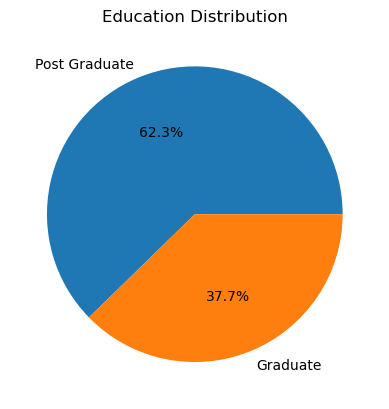

In [16]:
# Get the value counts of the Education column
edu_counts = df['Education'].value_counts()

# Create a pie chart with the proportion values
plt.pie(x=edu_counts.values, labels=edu_counts.index, autopct='%1.1f%%')
plt.title('Education Distribution')
plt.show()


From the above pie chart we can understand that the marital status of the customers and whether there is a particular status that is more likely to buy a car from Austo Motor Company. Here we understand that the Post Graduates make the 3/4th of the customer population and Graduates comprises of the rest 1/4th. Hence Post Graduates are more.

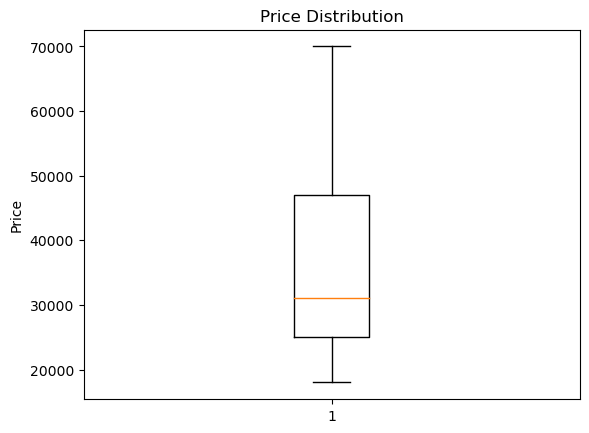

In [84]:
plt.boxplot(df['Price'])
plt.title('Price Distribution')
plt.ylabel('Price')
plt.show()

Here from the price distribution of the car that gets sold, we understand that the 50% of the price ranges from 25000 to above 45000, where the median price comes around of the price 30000 with the highest and lowest values ranging from 20000 to 70000

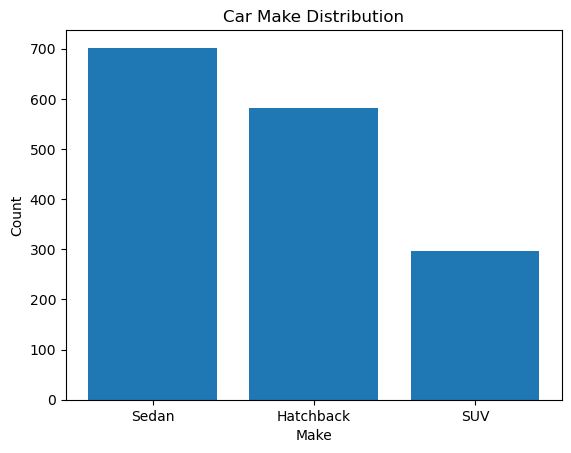

In [87]:
make_counts = df['Make'].value_counts()
plt.bar(make_counts.index, make_counts.values)
plt.title('Car Make Distribution')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()


From the above Car Make Distribution we understand that the most preferred car make among the customers are Sedan model and then the Hatchback Make and SUV model respectively.

# Bivariate Analysis

In [6]:
df.corr()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189614,0.616899,0.126267,0.458869,0.797831
No_of_Dependents,-0.189614,1.000000,-0.031746,0.131253,0.092890,-0.135839
Salary,0.616899,-0.031746,1.000000,0.071049,0.641560,0.409920
Partner_salary,0.126267,0.131253,0.071049,1.000000,0.813945,0.167725
Total_salary,0.458869,0.092890,0.641560,0.813945,1.000000,0.367823
Price,0.797831,-0.135839,0.409920,0.167725,0.367823,1.000000


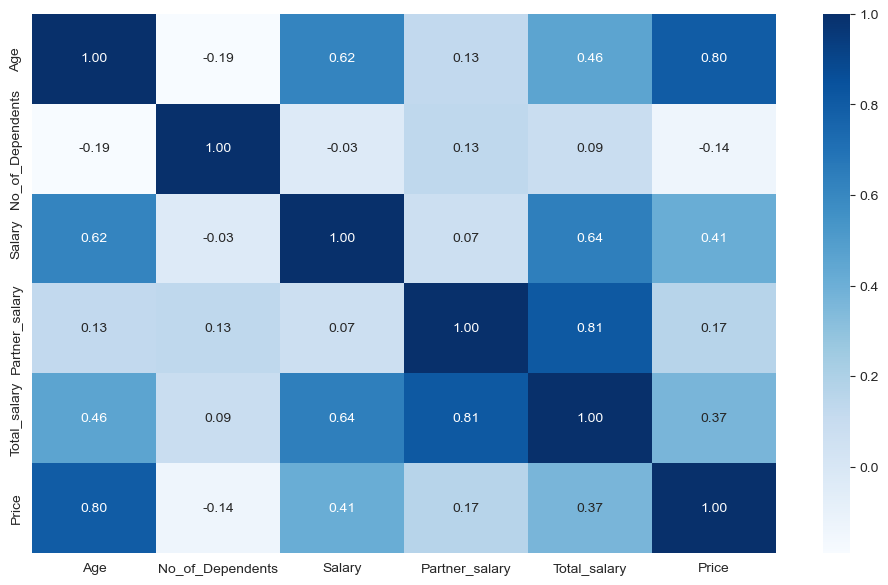

In [28]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

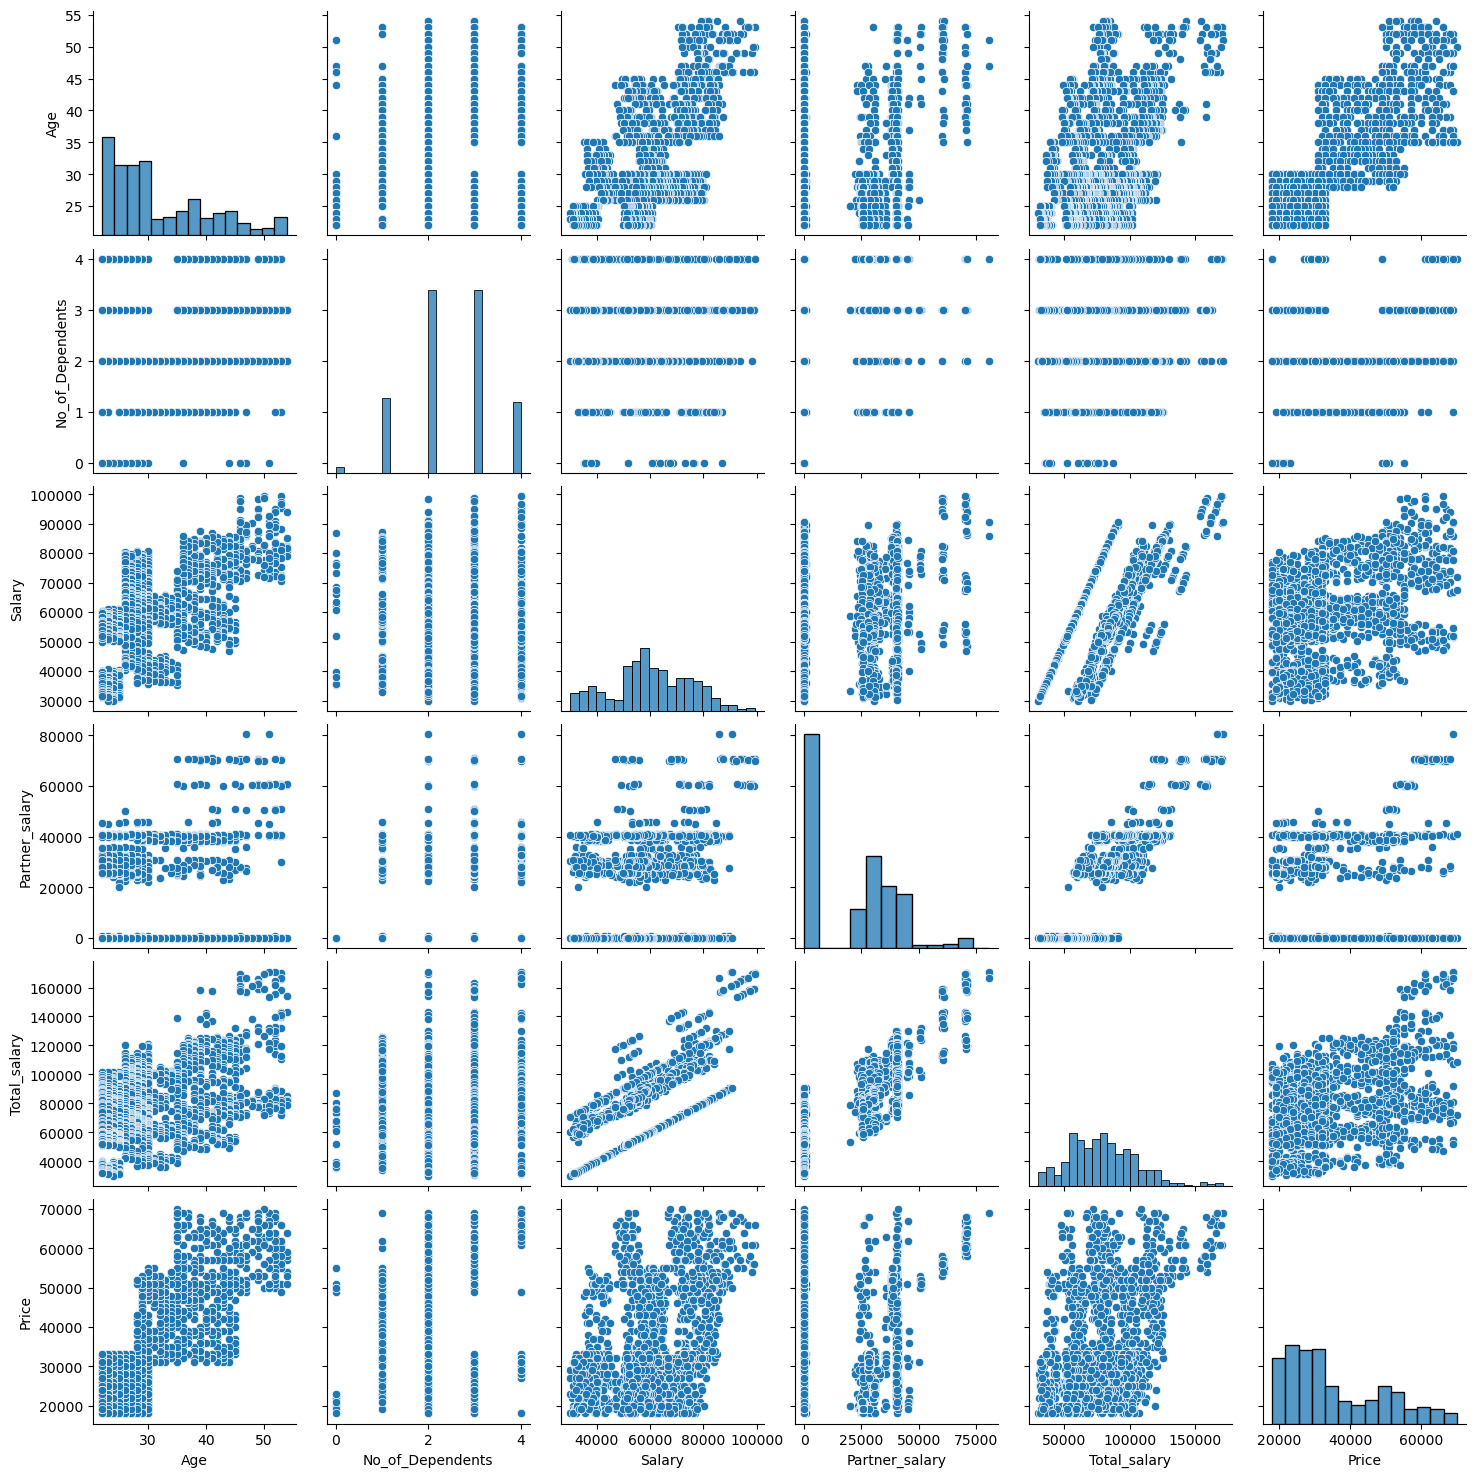

In [10]:
sns.pairplot(df)
plt.show()

From the above correlation map and pairplot, we can derive the following:

Age and Salary have a moderate positive correlation (0.62). This indicates that as Age increases, Salary tends to increase as well.

Age and Price have a strong positive correlation (0.80). This indicates that as Age increases, the Price of the car tends to increase as well.

No_of_Dependents and Total_salary have a weak negative correlation (-0.14). This indicates that as the number of dependents increases, Total_salary tends to decrease slightly.

Partner_salary and Total_salary have a strong positive correlation (0.80). This indicates that as Partner_salary increases, Total_salary tends to increase as well.

Salary and Total_salary have a moderate positive correlation (0.64). This indicates that as Salary increases, Total_salary tends to increase as well.

Price and Total_salary have a moderate positive correlation (0.36). This indicates that as Total_salary increases, the Price of the car tends to increase as well.

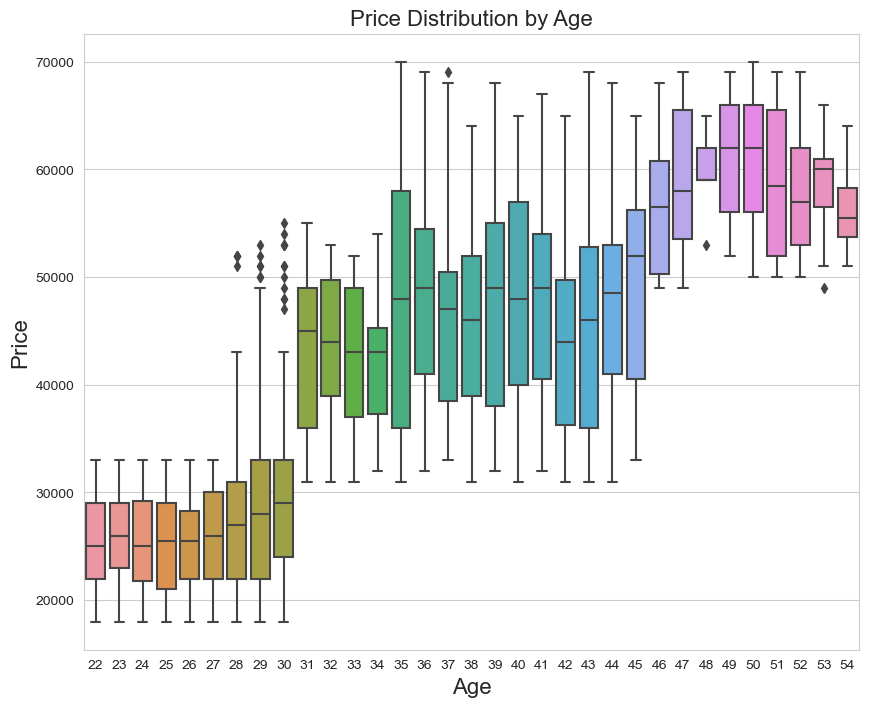

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Age', y='Price', data=df)
plt.title('Price Distribution by Age', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show()


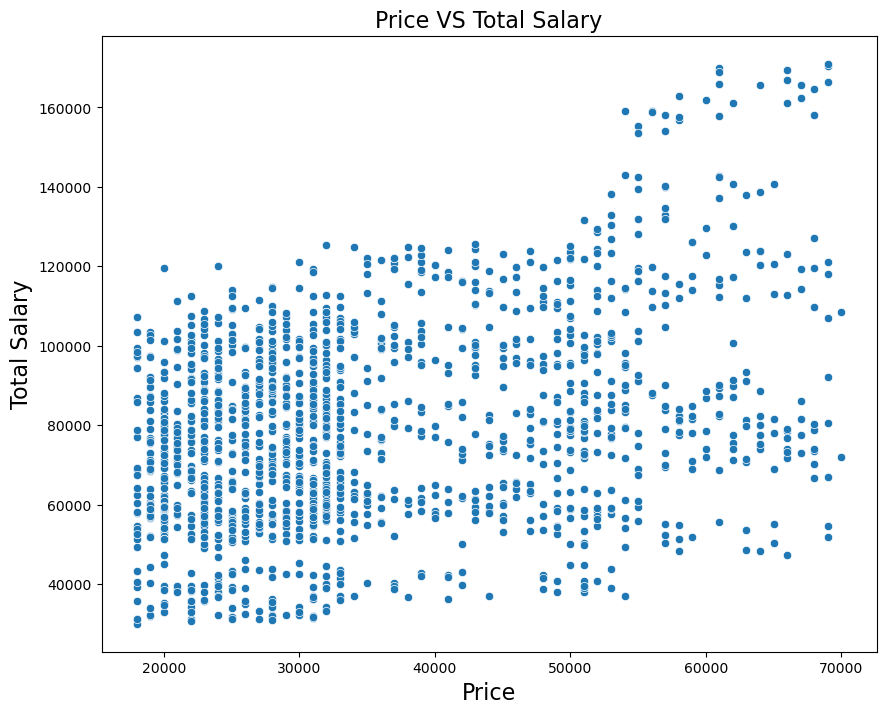

In [14]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Price',y = 'Total_salary',data = df)
plt.title('Price VS Total Salary',fontsize = 16)
plt.xlabel('Price',fontsize = 16)
plt.ylabel('Total Salary',fontsize = 16)
plt.show()

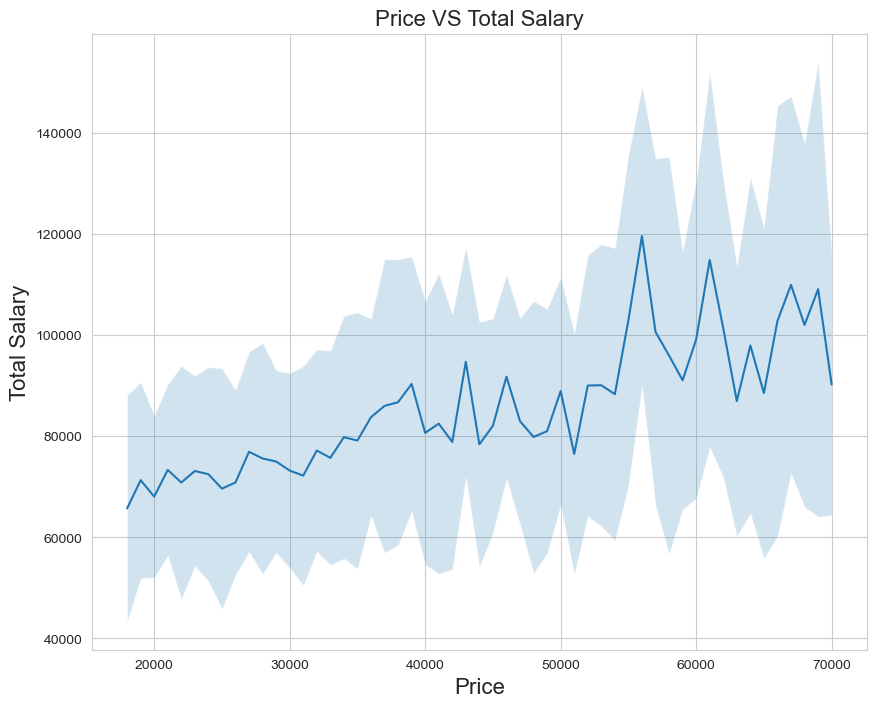

In [31]:
# compute mean and standard deviation of Total_salary for each Price value
grouped_data = df.groupby('Price')['Total_salary'].agg(['mean', 'std'])

# create plot with confidence bands
plt.figure(figsize=(10, 8))
sns.lineplot(x='Price', y='mean', data=grouped_data)
plt.fill_between(grouped_data.index, grouped_data['mean'] - grouped_data['std'], 
                 grouped_data['mean'] + grouped_data['std'], alpha=0.2)
plt.title('Price VS Total Salary', fontsize=16)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Total Salary', fontsize=16)
plt.show()


In [25]:
gender_make_counts = df.groupby(['Gender', 'Make']).size().reset_index(name='counts')
gender_totals = df.groupby('Gender').size().reset_index(name='totals')
gender_make_counts = pd.merge(gender_make_counts, gender_totals, on='Gender')
gender_make_counts['percentage'] = gender_make_counts['counts'] / gender_make_counts['totals'] * 100

suv_data = gender_make_counts[gender_make_counts['Make'] == 'SUV']
suv_data = suv_data[['Gender', 'percentage']].reset_index(drop=True)

#suv_data['Gender'] = suv_data['Gender'].replace('Femal', 'Female')
#suv_data['Gender'] = suv_data['Gender'].replace('Femle', 'Female')

men_percentage = suv_data.loc[suv_data['Gender'] == 'Male']['percentage'].iloc[0]
women_percentage = suv_data.loc[suv_data['Gender'] == 'Female']['percentage'].iloc[0]

if men_percentage > women_percentage:
    print("Men prefer SUV by a large margin, compared to women.")
else:
    print("Women prefer SUV by a larger margin than men.")



Women prefer SUV by a larger margin than men.


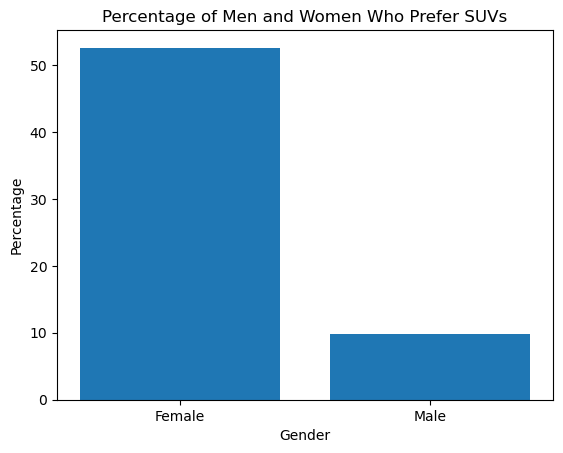

In [23]:
suv_data = gender_make_counts[gender_make_counts['Make'] == 'SUV']

# Create a bar chart of the percentages
plt.bar(suv_data['Gender'], suv_data['percentage'])
plt.title('Percentage of Men and Women Who Prefer SUVs')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

From the above graph we can identify that almost 50% of the Females prefer buying SUV's whereas a lesser amount of Males 10 % prefer to buying SUV. 
Based on the data and the analysis state I disagree with Steve Roger observation which says that “Men prefer SUV by a large margin, compared to the women where it is exactly the opposite
Women prefer SUV by a large margin compared to men

In [29]:
df_salary_carmake = df[['Make','Profession']]

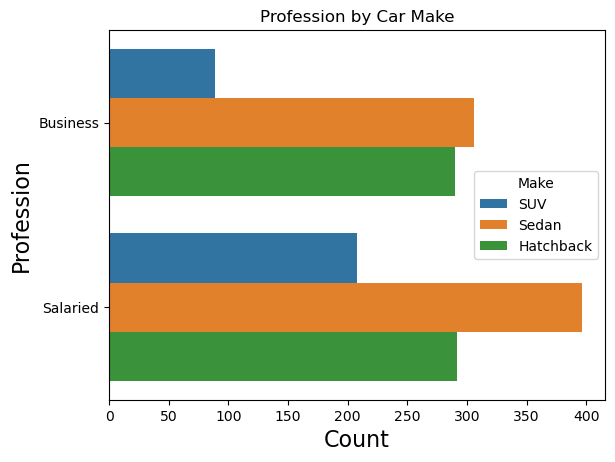

In [33]:
# create the countplot
sns.countplot(y='Profession', hue='Make', data=df_salary_carmake)

# add labels and title to the plot
plt.ylabel("Profession", fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.title('Profession by Car Make')

# display the plot
plt.show()

Here we can find that the count of salaried professionals who are buying Sedans comes around 400, whereas a business professional who buys Sedan comes to 300. Hence Ned Stark belief that a salaried person is more likely to buy a Sedan is true

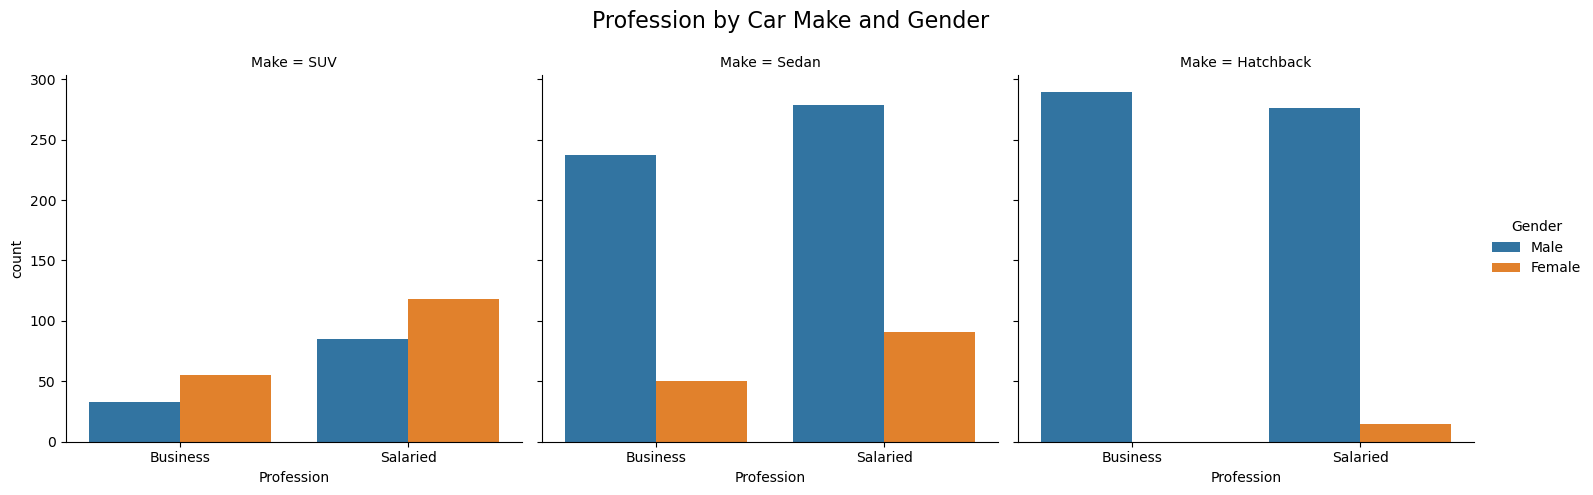

In [34]:
#he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale
# select the columns of interest
df_prof_make_gender = df[['Profession', 'Make', 'Gender']]

# create the grouped bar chart
sns.catplot(x='Profession', col='Make', hue='Gender', data=df_prof_make_gender, kind='count')

# add labels and title to the plot
plt.suptitle('Profession by Car Make and Gender', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

Here from the graph we can find that Salaried Male are easier targets for Sedan or Hatchback than the SUV's as we can see that 
the number of Salaried Male opting for either Sedan or Hatchback comes around 275, whereas the same Salaried Male opting for SUV is just around 125.
Hence Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan Sale is False or wrong.

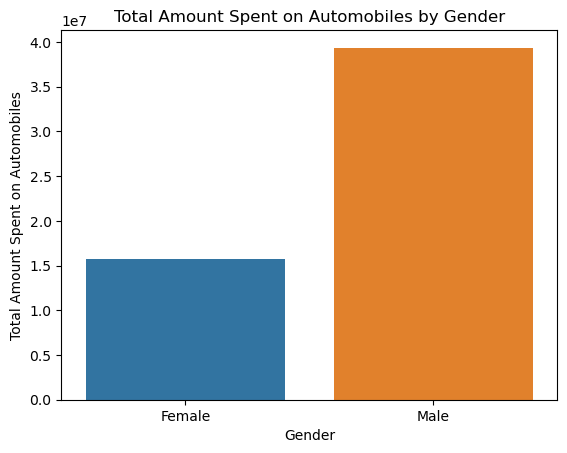

In [45]:
df_spending_gender = df.groupby('Gender')['Price'].sum().reset_index()
sns.barplot(x='Gender', y='Price', data=df_spending_gender)
# set the plot title and axis labels
plt.title('Total Amount Spent on Automobiles by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent on Automobiles')
plt.show()

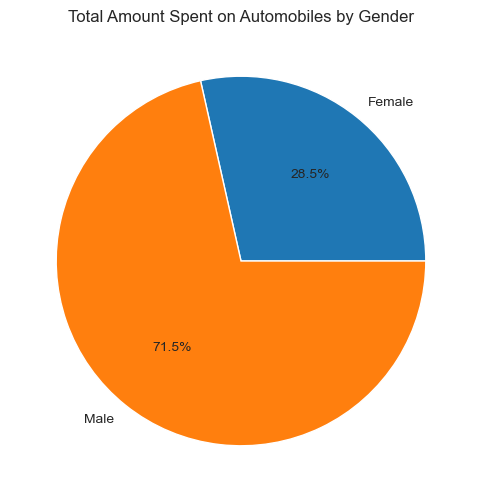

In [32]:
df_spending_gender = df.groupby('Gender')['Price'].sum().reset_index()

# create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(df_spending_gender['Price'], labels=df_spending_gender['Gender'], autopct='%1.1f%%')
plt.title('Total Amount Spent on Automobiles by Gender')

plt.show()


Here we can observe that more males are purchasing automobiles compared to females, then the business can tailor its marketing efforts towards men more as they have been purchasing more cars .

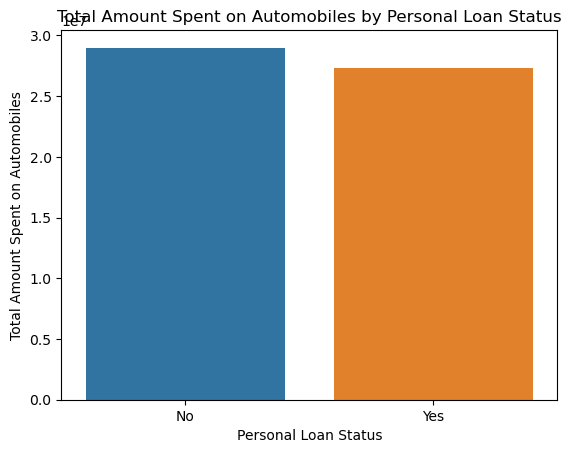

In [46]:

auto_spending_loan = df.groupby('Personal_loan')['Price'].sum().reset_index()
sns.barplot(x='Personal_loan', y='Price', data=auto_spending_loan,palette=custom_palette)

# set the plot title and axis labels
plt.title('Total Amount Spent on Automobiles by Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Total Amount Spent on Automobiles')
plt.show()

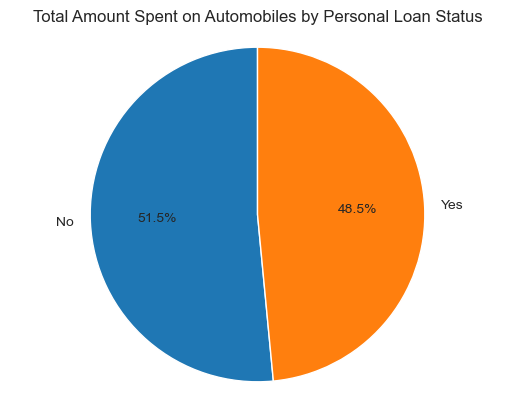

In [33]:
auto_spending_loan = df.groupby('Personal_loan')['Price'].sum().reset_index()

plt.pie(auto_spending_loan['Price'], labels=auto_spending_loan['Personal_loan'], autopct='%1.1f%%', startangle=90)
plt.title('Total Amount Spent on Automobiles by Personal Loan Status')
plt.axis('equal')
plt.show()

From the above distribution we can see that Based on the observation that people without personal loans are spending slightly more on purchasing cars compared to those with personal loans, we can infer a couple of things that a company can use to optimize their marketing campaign:

The company can a target customers without personal loans with marketing campaigns that emphasize the benefits of purchasing a car without taking a loan. For example, the company can advertise the benefits of owning a car outright, such as lower long-term costs, avoiding interest payments, and having full ownership and control of the car.


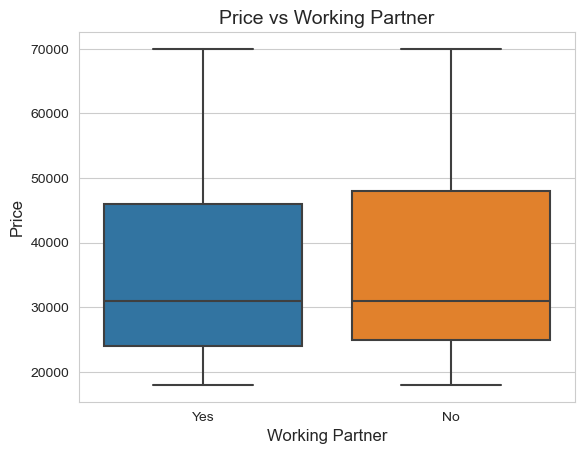

In [22]:

sns.boxplot(x="Partner_working", y="Price", data=df)

# add labels and title
plt.xlabel("Working Partner", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Price vs Working Partner", fontsize=14)

# show the plot
plt.show()

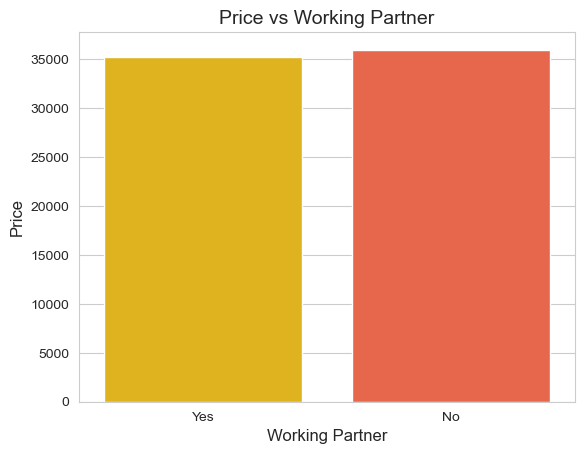

In [23]:
custom_palette = sns.color_palette(["#FFC300", "#FF5733", "#C70039", "#900C3F"])
sns.barplot(x="Partner_working", y="Price", data=df, ci=None,palette=custom_palette)

# add labels and title
plt.xlabel("Working Partner", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Price vs Working Partner", fontsize=14)

# show the plot
plt.show()

From the above boxplot and bargraph we can see that having a working partner does not lead to  the purchase of a higher-priced car as both the distribution of price for both partner working or not seems to be similar with the mean coming around above 30000 and max value 70000.

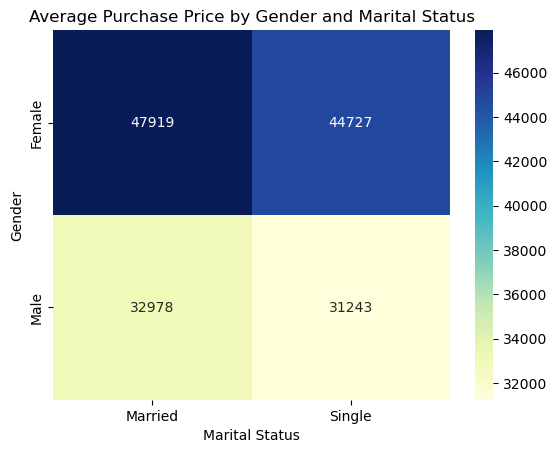

In [54]:
pivot = pd.pivot_table(df, values='Price', index=['Gender'], columns=['Marital_status'], aggfunc=np.mean)

# Create a heatmap with the pivot table
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt=".0f")

# Set the title and axis labels
plt.title("Average Purchase Price by Gender and Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Gender")

# Display the plot
plt.show()

In [16]:
df_salary=df[["Gender","Marital_status","Price","Make"]]


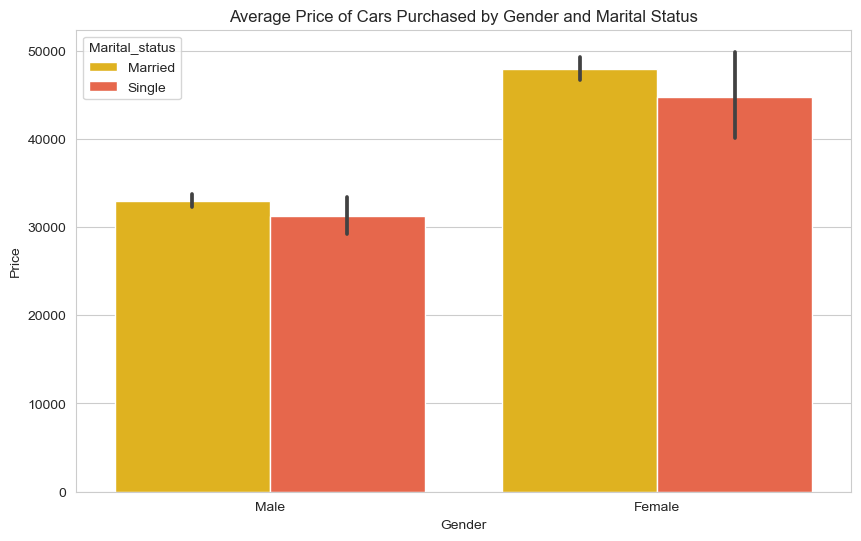

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
custom_palette = sns.color_palette(["#FFC300", "#FF5733", "#C70039", "#900C3F"])
sns.barplot(data=df_salary, x="Gender", y="Price", hue="Marital_status", palette=custom_palette)
plt.title("Average Price of Cars Purchased by Gender and Marital Status")
plt.xlabel("Gender")
plt.ylabel("Price")
plt.show()


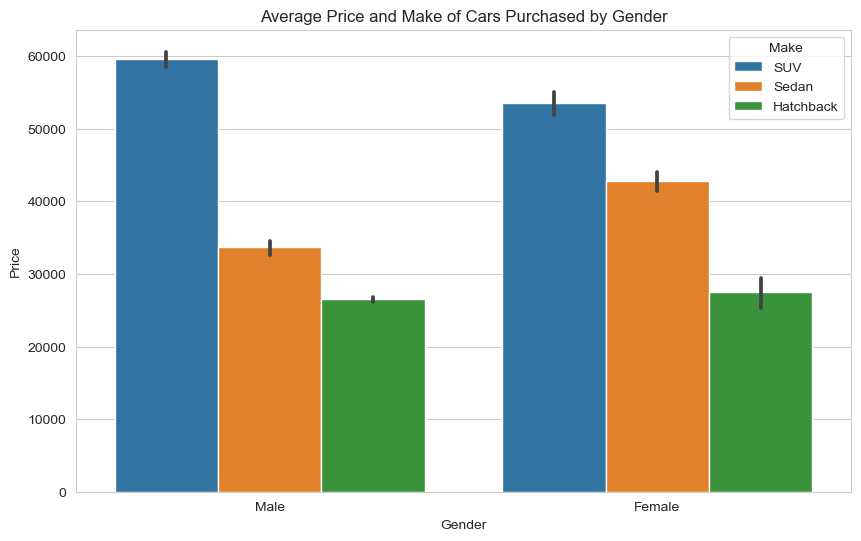

In [67]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_salary, x="Gender", y="Price", hue="Make")
plt.title("Average Price and Make of Cars Purchased by Gender")
plt.xlabel("Gender")
plt.ylabel("Price")
plt.show()

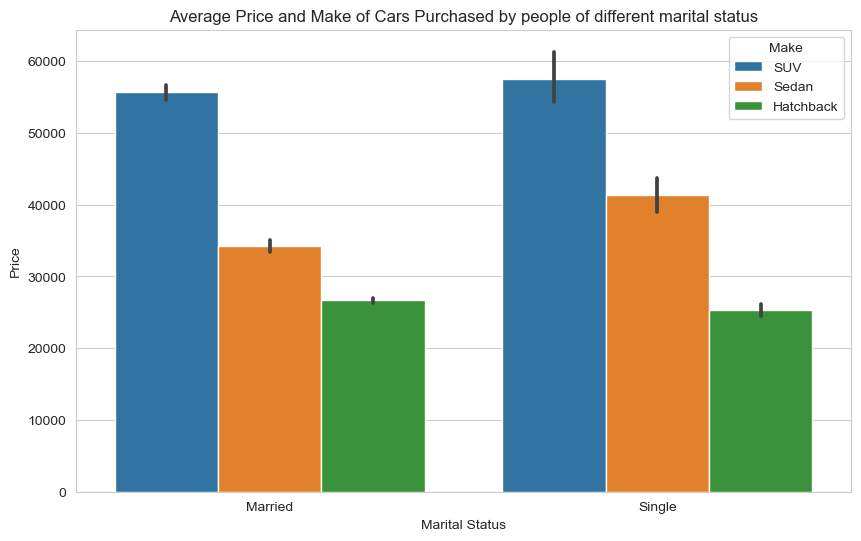

In [68]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_salary, x="Marital_status", y="Price", hue="Make")
plt.title("Average Price and Make of Cars Purchased by people of different marital status")
plt.xlabel("Marital Status")
plt.ylabel("Price")
plt.show()

In [35]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

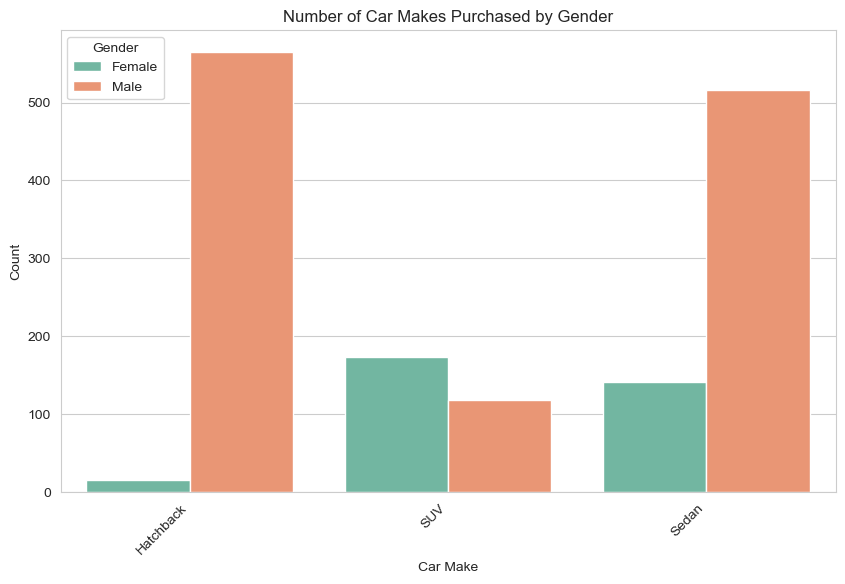

In [24]:

# Count the number of car makes purchased by each gender
df_counts = df.groupby(['Gender', 'Make'])['Make'].count().reset_index(name='Count')

# Set the style and size of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with car make on the x-axis, count on the y-axis, and color-coded by gender
sns.barplot(data=df_counts, x="Make", y="Count", hue="Gender", palette="Set2")

# Add labels and a title
plt.title("Number of Car Makes Purchased by Gender")
plt.xlabel("Car Make")
plt.ylabel("Count")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

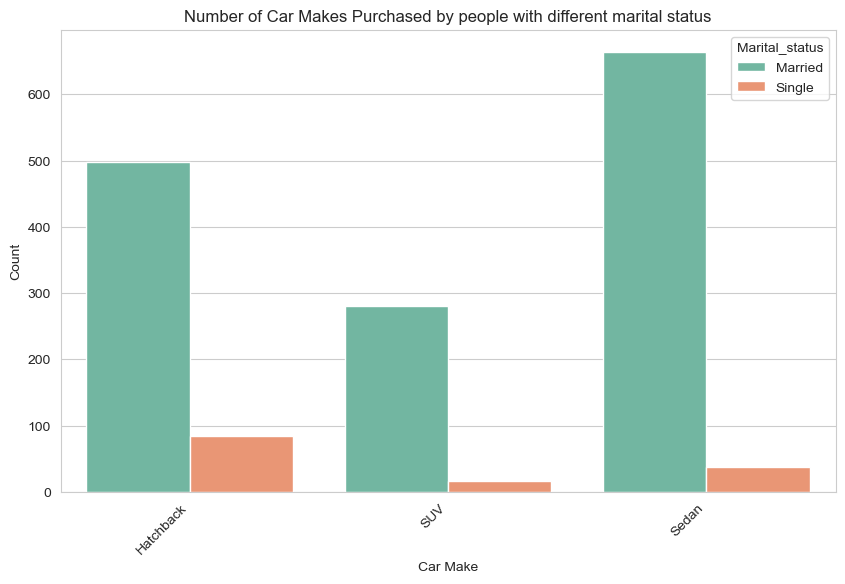

In [27]:
# Count the number of car makes purchased by each gender
df_counts = df.groupby(['Marital_status', 'Make'])['Make'].count().reset_index(name='Count')

# Set the style and size of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create a bar plot with car make on the x-axis, count on the y-axis, and color-coded by gender
sns.barplot(data=df_counts, x="Make", y="Count", hue="Marital_status", palette="Set2")

# Add labels and a title
plt.title("Number of Car Makes Purchased by people with different marital status")
plt.xlabel("Car Make")
plt.ylabel("Count")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()